# World map plot test
https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b

In [25]:
pip install geopandas

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/27/27/2687abaa2ac02b5814e2929a5033da1e5d132c19a904dc56f77f63fd6eb9/geopandas-0.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/62/50/cc0cbc48d4f11899611edfb23a99d9d43101d3d28f2ef90a5506782cae84/fiona-1.9.5-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/30/bd/b9bd3761f08754e8dbb34c5a647db2099b348ab5da338e90980caf280e37/pyproj-3.6.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for shapely>=1.8.0 from https://files.pythonhosted.org/packages/2c/b1/ca09649b4abe06366d41e90c3eee95a7741657404404a63bd0e8b53e32b8/shapely-2.0.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 

In [51]:
pip install mapclassify

  Obtaining dependency information for mapclassify from https://files.pythonhosted.org/packages/3f/f1/8db36df379703311c16e5341b408dad04e34cfded66f38e351c380fbd5ae/mapclassify-2.6.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [52]:
import mapclassify

In [53]:
import pyalex
from pyalex import Works, Authors, Sources, Institutions, Concepts, Publishers, Funders
from itertools import chain
import pandas as pd 
from matplotlib import pyplot as plt
import json
from urllib.request import urlopen
from genderize import Genderize
import gender_guesser.detector as gender
import pycountry
import re
import numpy as np
import warnings
import geopandas

In [54]:
country_df=pd.read_csv('country_dataframe.csv')

In [55]:
df=country_df['author0country0'].reset_index()

In [56]:
# generate country code  based on country name 
import pycountry 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(alpha_2=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
df['CODE']=alpha3code(df.author0country0)
df.head()

,index,author0country0,CODE
0,0,US,USA
1,1,RU,RUS
2,2,CN,CHN
3,3,GB,GBR
4,4,JP,JPN


In [57]:
# first let us merge geopandas data with our data
# 'naturalearth_lowres' is geopandas datasets so we can use it directly
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']


/var/folders/23/_5nwl30d12q_2dv4hhpqjfl00000gn/T/ipykernel_26268/3235671817.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


In [58]:
world

,pop_est,continent,name,CODE,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [59]:
df

,index,author0country0,CODE
0,0,US,USA
1,1,RU,RUS
2,2,CN,CHN
3,3,GB,GBR
4,4,JP,JPN
...,...,...,...
30066,30066,Unknown,None
30067,30067,RU,RUS
30068,30068,JP,JPN
30069,30069,JP,JPN


In [60]:
# then merge with our data 
merge=pd.merge(world,df,on='CODE')
merge

,pop_est,continent,name,CODE,gdp_md_est,geometry,index,author0country0
0,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",22444,TZ
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",24152,TZ
2,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",16,CA
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",72,CA
4,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",284,CA
...,...,...,...,...,...,...,...,...
17577,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",21064,RS
17578,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",21238,RS
17579,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",21546,RS
17580,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",28518,RS


In [61]:
# last thing we need to do is - merge again with our location data which contains each country’s latitude and longitude
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')


In [62]:
location

,name,latitude,longitude
0,Afghanistan,33.939110,67.709953
1,Albania,41.153332,20.168331
2,Algeria,28.033886,1.659626
3,Angola,-11.202692,17.873887
4,Argentina,-38.416097,-63.616672
...,...,...,...
153,Vietnam,14.058324,108.277199
154,W. Sahara,24.215527,-12.885834
155,Yemen,15.552727,48.516388
156,Zambia,-13.133897,27.849332


In [63]:
merge=merge.merge(location,on='name').sort_values(by='pop_est',ascending=False).reset_index()

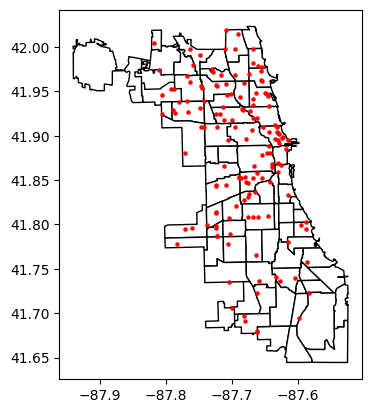

In [119]:
base = chicago.plot(color='white', edgecolor='black')

groceries.plot(ax=base, marker='o', color='red', markersize=5);

In [133]:
almost_world=world[world['name']!='United States of America']

In [ ]:
#BEAUTIFUL EXAMPLE!

<Axes: >

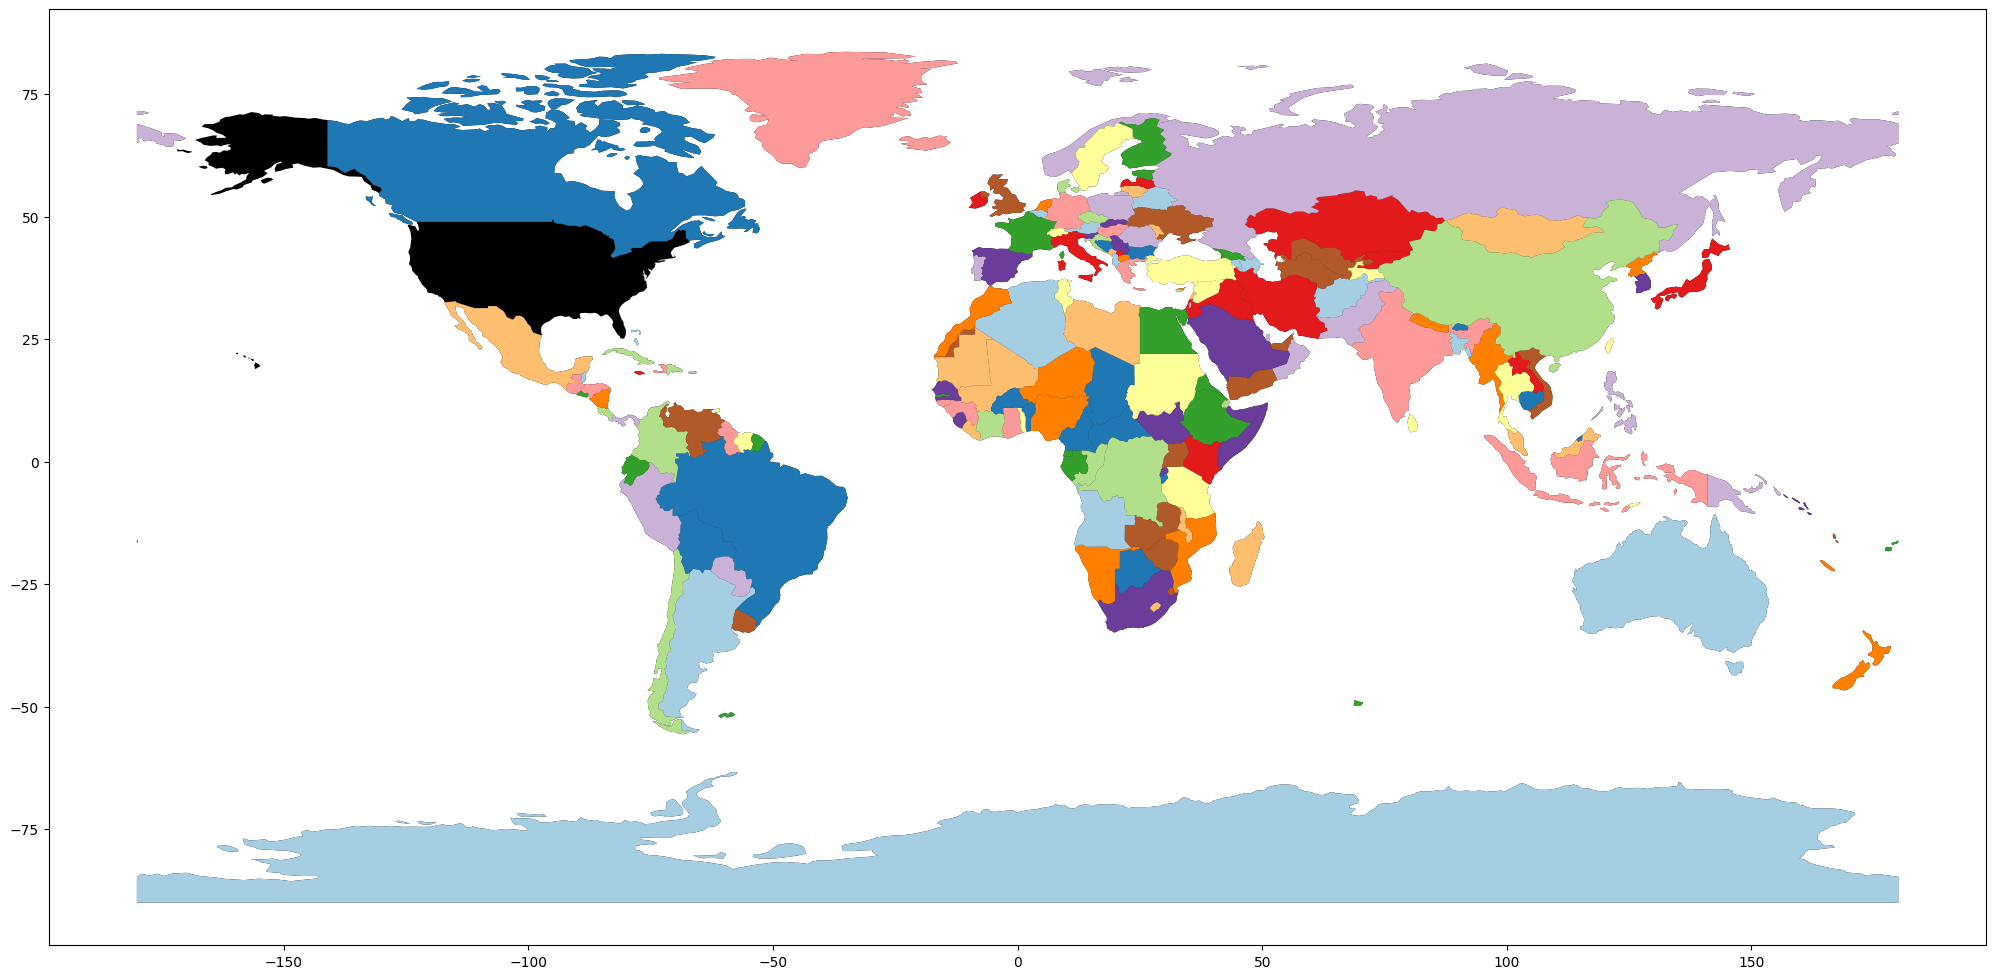

In [136]:
# plot whole world map 
base = world.plot(figsize=(25, 20),
           legend=True,color='k')

#plot part of the world in colors - rest in black
almost_world.plot(ax=base, column='name', cmap='Paired')

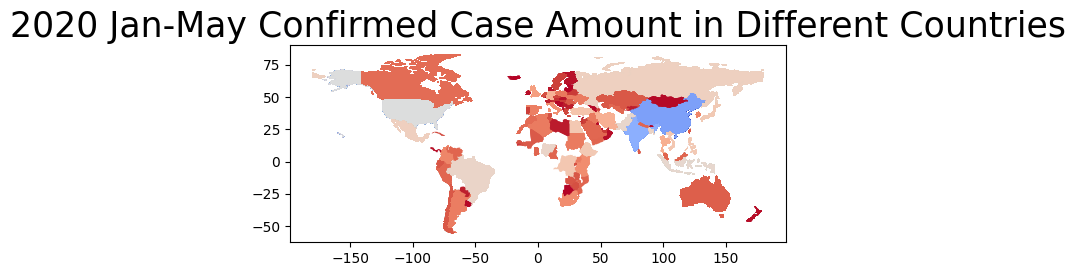

In [125]:
## plot confirmed cases world map 
merge.plot(cmap='coolwarm')
plt.title('2020 Jan-May Confirmed Case Amount in Different Countries',fontsize=25)
# add countries names and numbers 
#for i in range(0,10):
#    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge.name[i],merge.pop_est[i]),size=10)
plt.show()


<Axes: >

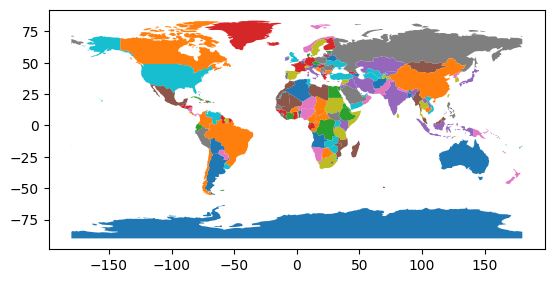

In [126]:
world.plot(column='name')

/opt/homebrew/Cellar/jupyterlab/4.0.7/libexec/lib/python3.11/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self.bins = quantile(y, k=k)


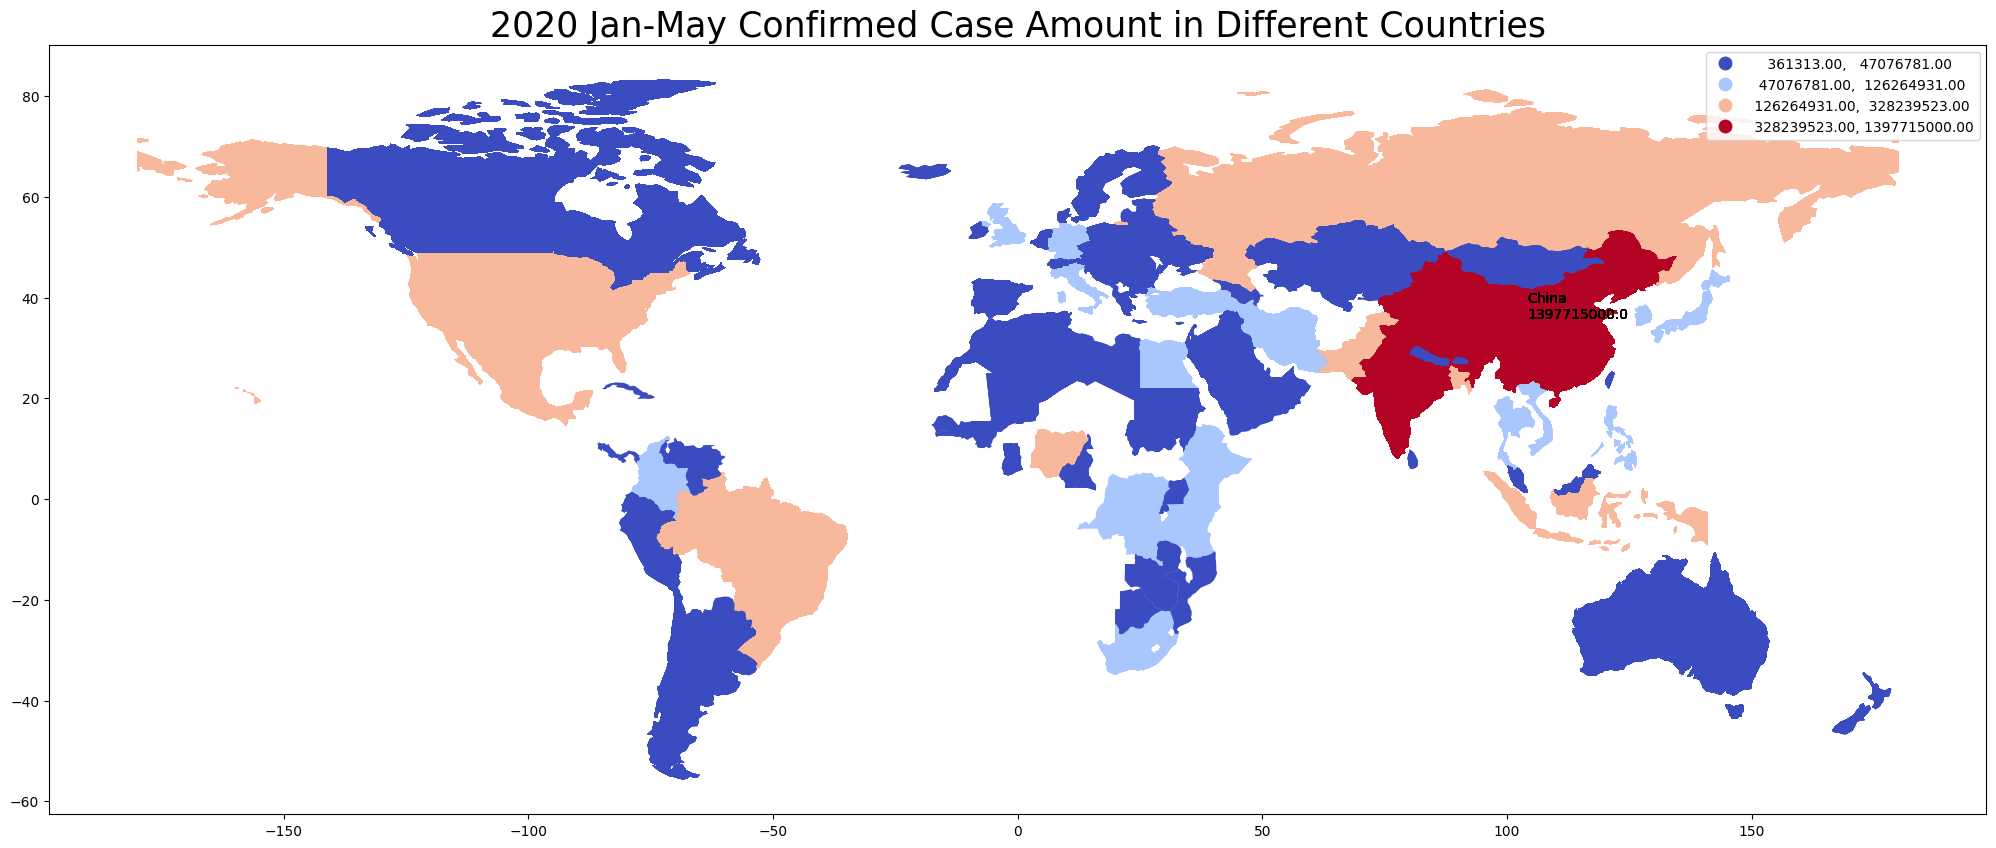

In [78]:
# plot confirmed cases world map 
merge.plot(column='pop_est', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='coolwarm',
          missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",},)
plt.title('2020 Jan-May Confirmed Case Amount in Different Countries',fontsize=25)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge.name[i],merge.pop_est[i]),size=10)
plt.show()

scheme options:
(e.g. ‘box_plot’, ‘equal_interval’, ‘fisher_jenks’, ‘fisher_jenks_sampled’, ‘headtail_breaks’, ‘jenks_caspall’, ‘jenks_caspall_forced’, ‘jenks_caspall_sampled’, ‘max_p_classifier’, ‘maximum_breaks’, ‘natural_breaks’, ‘quantiles’, ‘percentiles’, ‘std_mean’ or ‘user_defined’)

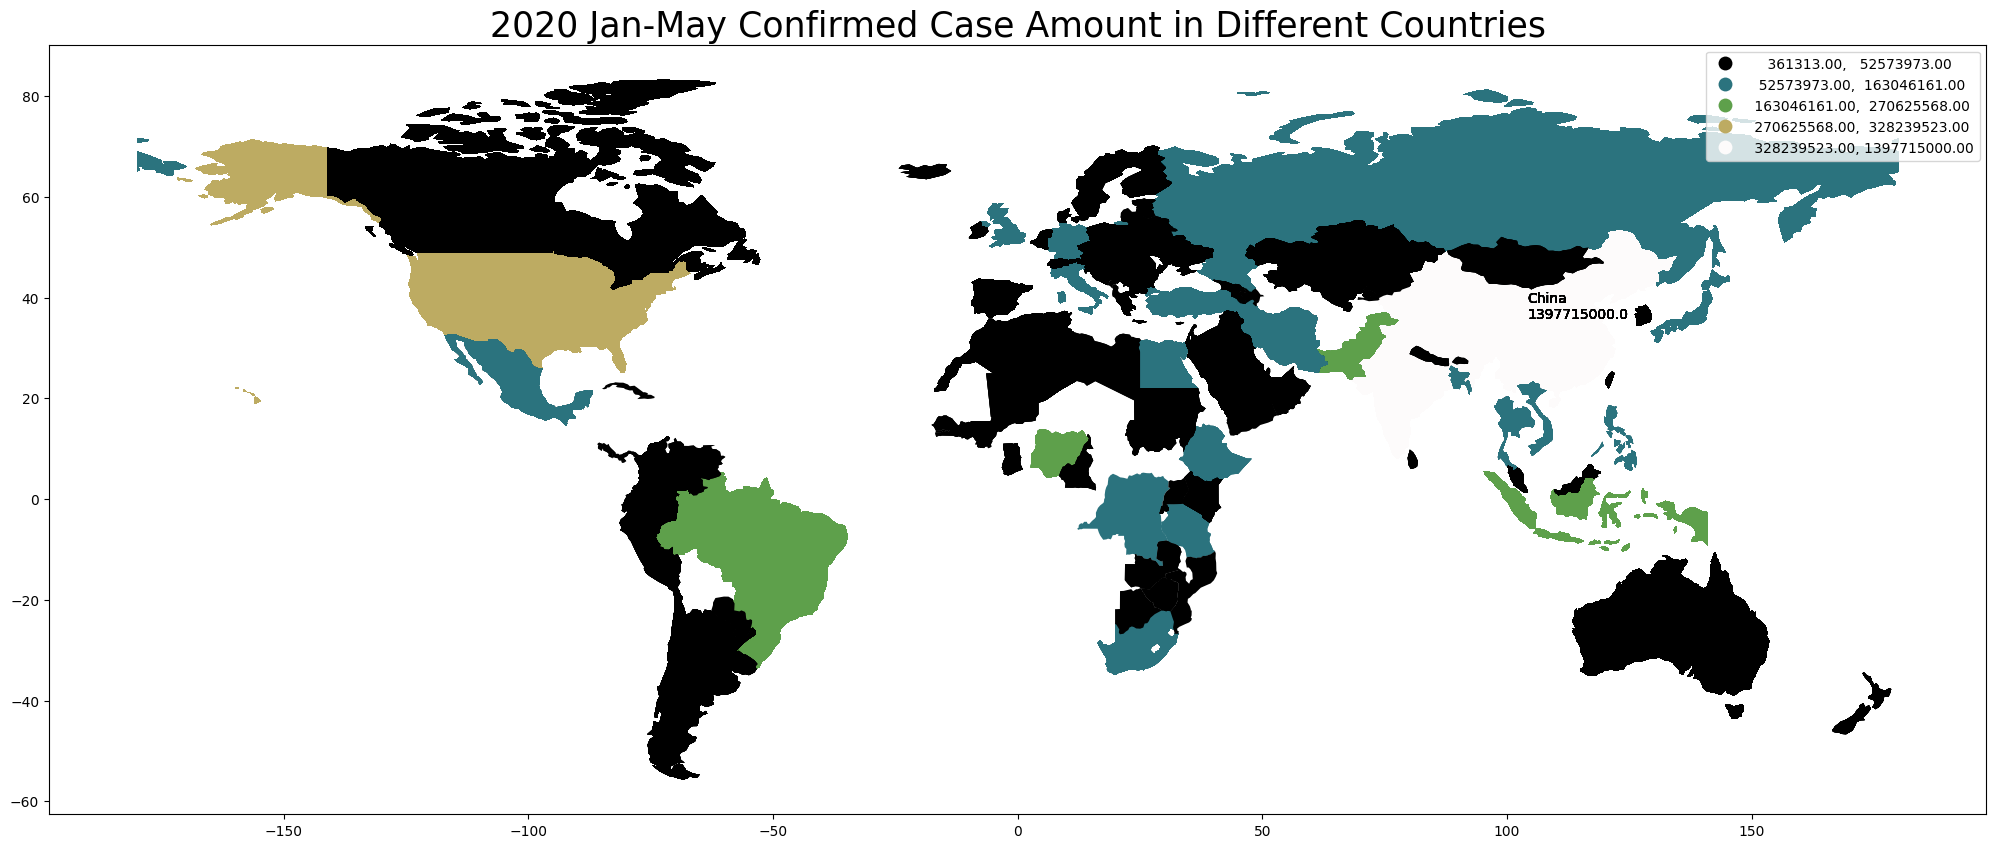

In [101]:
# plot confirmed cases world map 
merge.plot(column='pop_est', scheme="natural_breaks",
           figsize=(25, 20),
           legend=True,cmap='gist_earth')
plt.title('2020 Jan-May Confirmed Case Amount in Different Countries',fontsize=25)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge.name[i],merge.pop_est[i]),size=10)
plt.show()

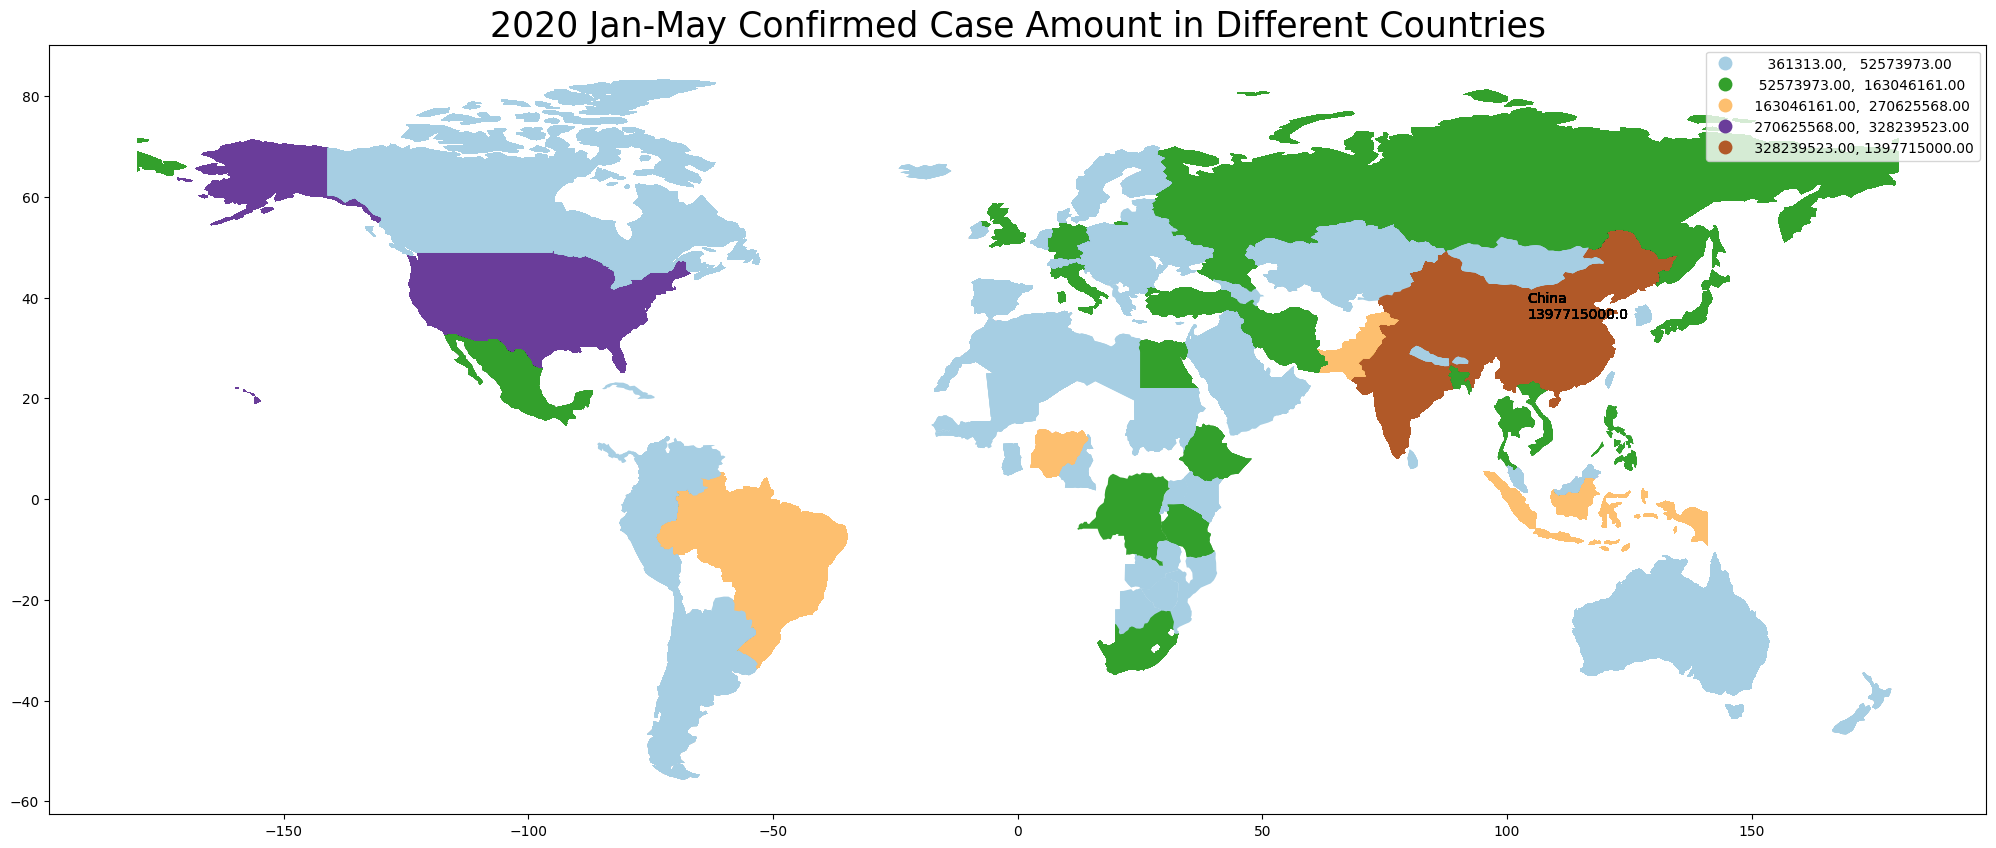

In [102]:
# plot confirmed cases world map 
merge.plot(column='pop_est', scheme="natural_breaks",
           figsize=(25, 20),
           legend=True,cmap='Paired')
plt.title('2020 Jan-May Confirmed Case Amount in Different Countries',fontsize=25)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge.name[i],merge.pop_est[i]),size=10)
plt.show()

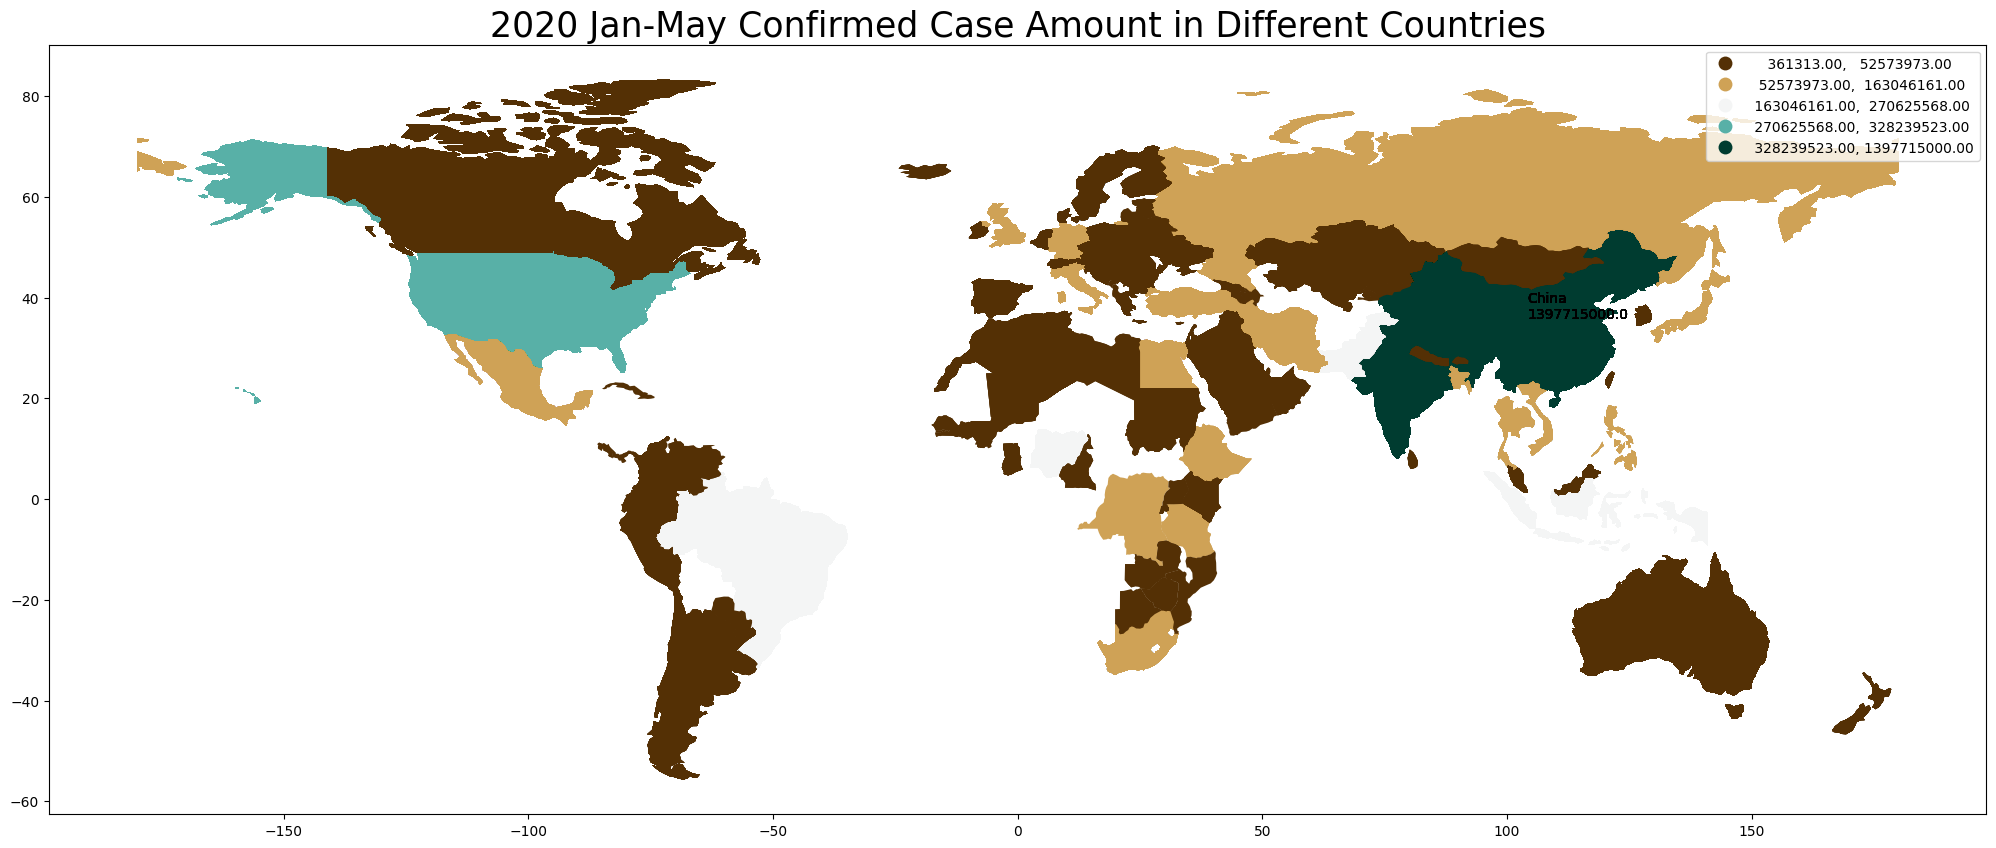

In [103]:
# plot confirmed cases world map 
merge.plot(column='pop_est', scheme="natural_breaks",
           figsize=(25, 20),
           legend=True,cmap='BrBG')
plt.title('2020 Jan-May Confirmed Case Amount in Different Countries',fontsize=25)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge.name[i],merge.pop_est[i]),size=10)
plt.show()

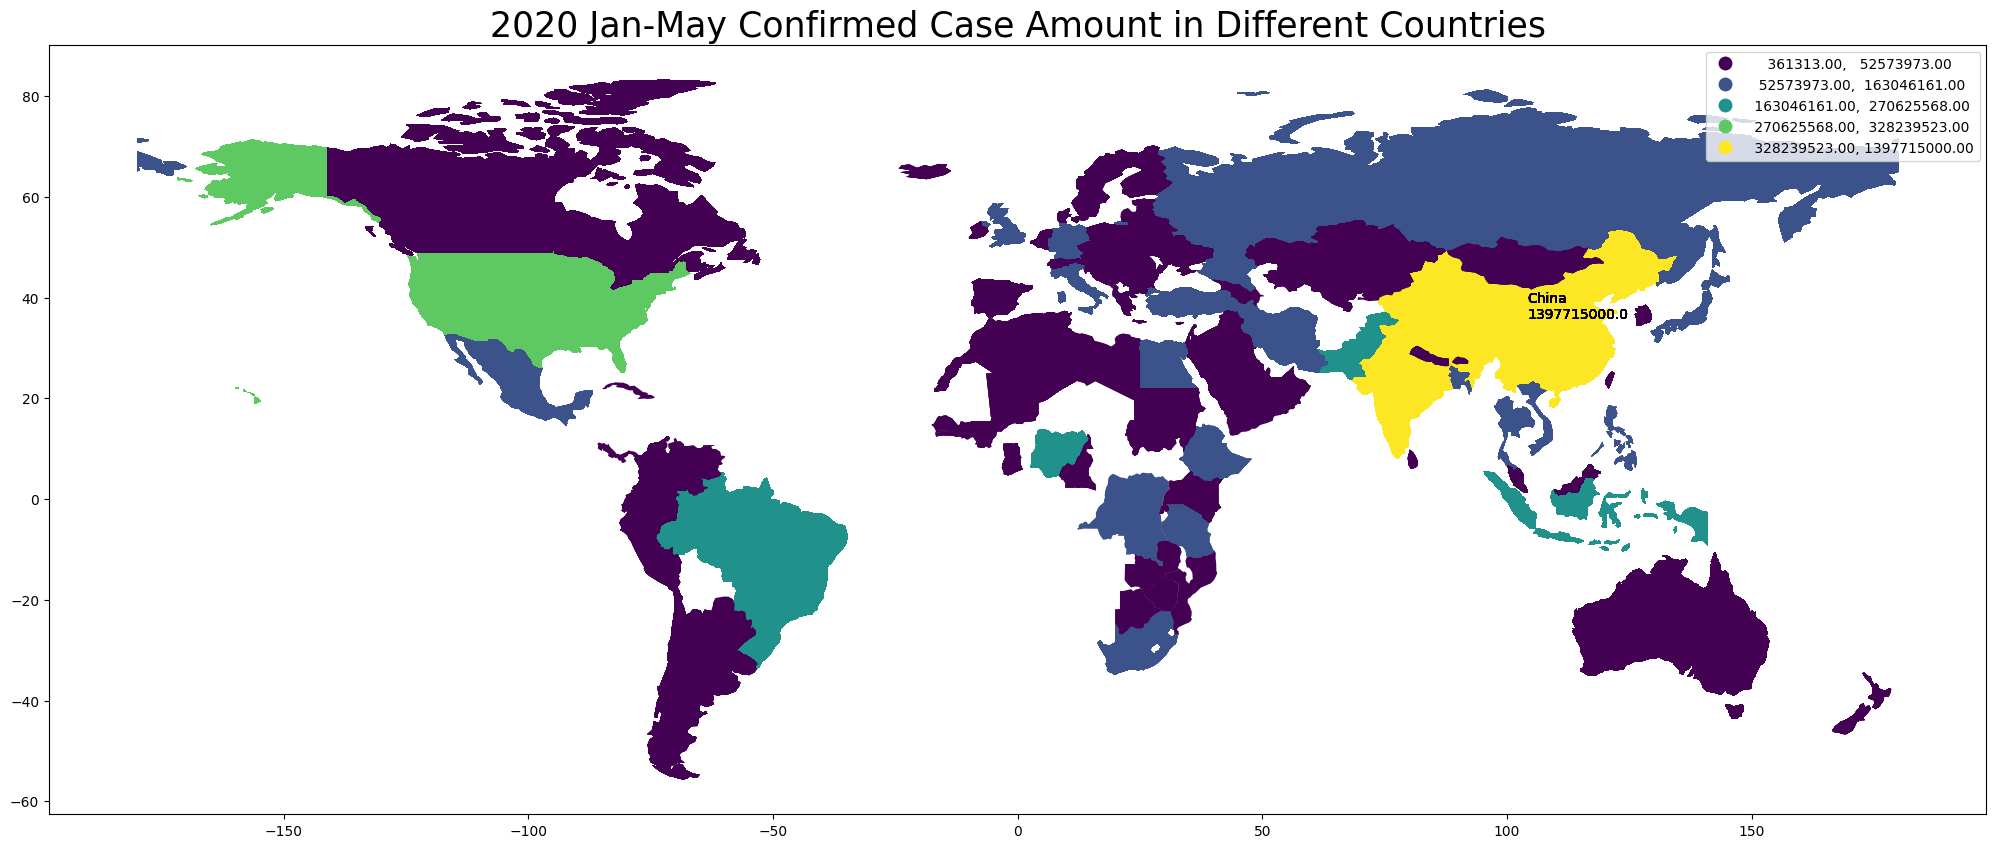

In [104]:
# plot confirmed cases world map 
merge.plot(column='pop_est', scheme="natural_breaks",
           figsize=(25, 20),
           legend=True,cmap='viridis')
plt.title('2020 Jan-May Confirmed Case Amount in Different Countries',fontsize=25)
# add countries names and numbers 
for i in range(0,10):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n{}".format(merge.name[i],merge.pop_est[i]),size=10)
plt.show()

In [68]:
#another method 

In [71]:
pip install geodatasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [74]:
import geodatasets

chicago = geopandas.read_file(geodatasets.get_path("geoda.chicago_commpop"))

groceries = geopandas.read_file(geodatasets.get_path("geoda.groceries"))

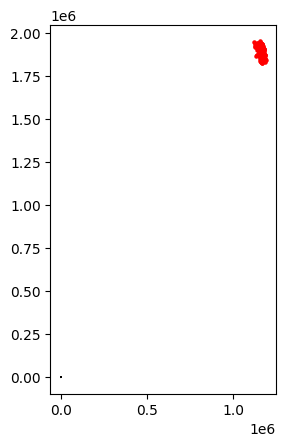

In [75]:
fig, ax = plt.subplots()

chicago.plot(ax=ax, color='white', edgecolor='black')


groceries.plot(ax=ax, marker='o', color='red', markersize=5)


plt.show();

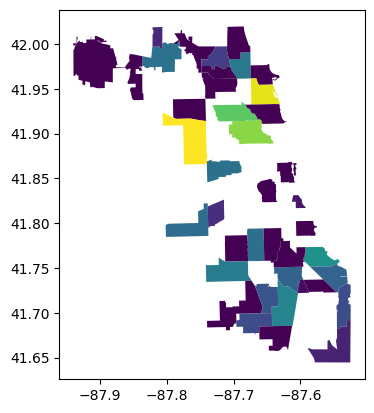

In [85]:

chicago.loc[np.random.choice(chicago.index, 30), 'POP2010'] = np.nan

chicago.plot(column='POP2010');

/opt/homebrew/Cellar/jupyterlab/4.0.7/libexec/lib/python3.11/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  self.bins = quantile(y, k=k)


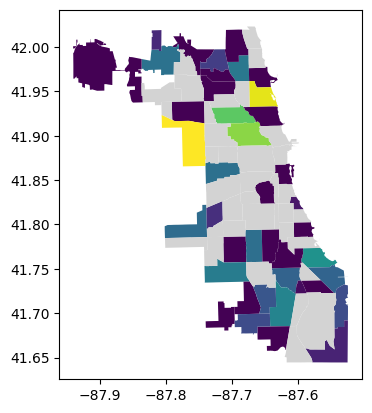

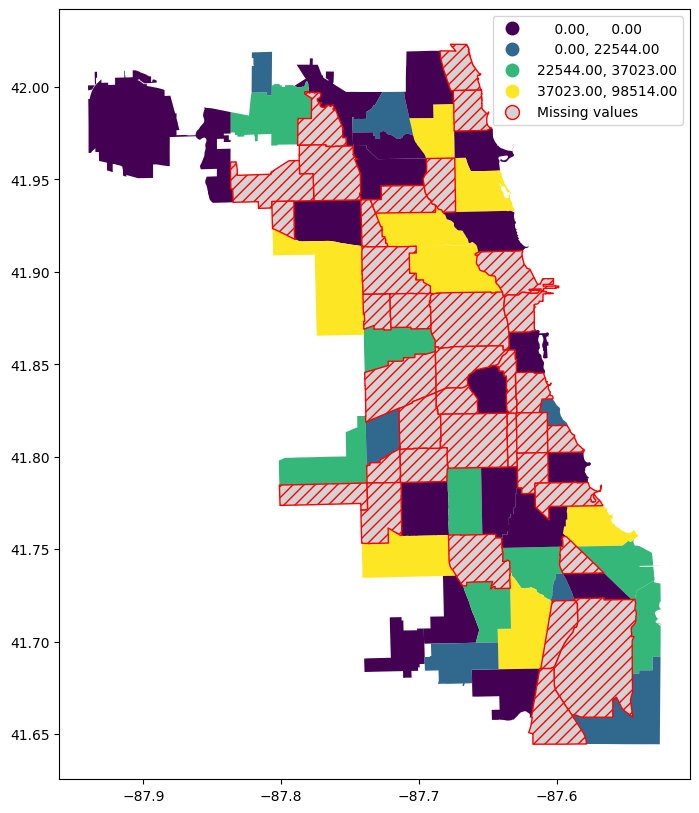

In [86]:
chicago.plot(column='POP2010', missing_kwds={'color': 'lightgrey'});

chicago.plot(
    column="POP2010",
    legend=True,
    scheme="quantiles",
    figsize=(15, 10),
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
);


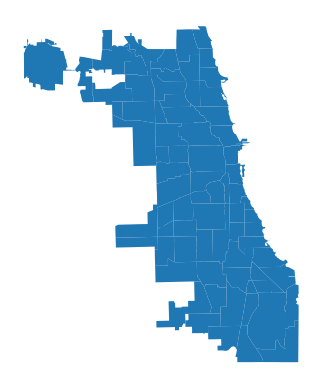

In [87]:
ax = chicago.plot()

ax.set_axis_off();

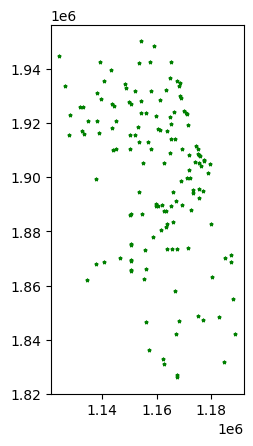

In [88]:
groceries.plot(marker='*', color='green', markersize=5);


groceries = groceries.to_crs(chicago.crs)

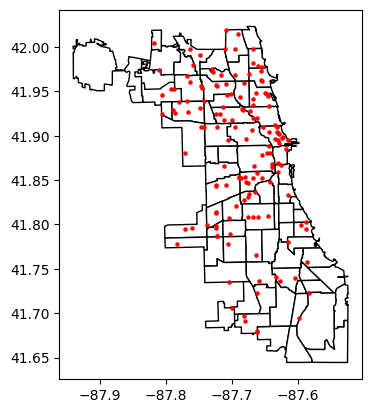

In [89]:
base = chicago.plot(color='white', edgecolor='black')

groceries.plot(ax=base, marker='o', color='red', markersize=5);

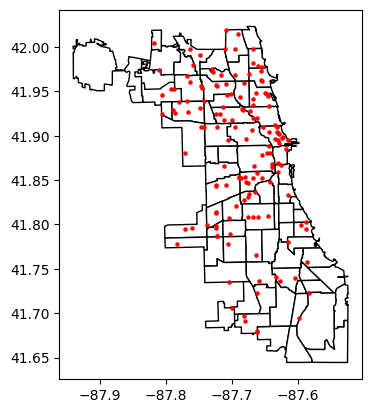

In [90]:
fig, ax = plt.subplots()

chicago.plot(ax=ax, color='white', edgecolor='black')


groceries.plot(ax=ax, marker='o', color='red', markersize=5)


plt.show();